In [73]:
# import Data Manupulating library called Pandas 
import pandas as pd 
# import Data Visualization Library called Matplotlib.pyplot
import matplotlib.pyplot as plt 
import seaborn as sns 


import warnings

warnings.filterwarnings("ignore")





In [74]:
df = pd.read_csv("Business Case_Moneyonclick.csv")
df.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
0,28-Jul-13,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20%,50,40.0
1,30-Jul-13,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20%,50,40.0
2,05-Jul-13,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20%,100,80.0
3,21-Jul-13,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 10/9956CMHN Swarovski Crys...",2724275075270,1,20%,352,281.6
4,29-Jul-13,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 104899BKSB Silver-Tone Bla...",2724275168361,1,20%,202,161.6


In [75]:

df.isnull().sum()

Order Date       0
Week Number      0
Order ID         0
Category         0
Item Type        0
Seller Name      0
Brand            1
Item Title       0
Bar Code         0
Quantity sold    0
Margin %         0
Price            0
Cost             0
dtype: int64

In [76]:
print("Column headers in the Data Frame : ", df.columns)
print("Number of Rows and Columns in dataframe : ", df.shape)

Column headers in the Data Frame :  Index(['Order Date', 'Week Number', 'Order ID', 'Category', 'Item Type',
       'Seller Name', 'Brand', 'Item Title', 'Bar Code', 'Quantity sold',
       'Margin %', 'Price', 'Cost'],
      dtype='object')
Number of Rows and Columns in dataframe :  (27462, 13)


## What are the Total Sales for  each Category in the Week 29

`SQL Query`

`SELECT Category, sum(Qunatity_sold) FROM Sales_table`

`WHERE Week_Number == 29`

`GROUPBY Category `

In [77]:
# let us first get All the Week 29 data points and ythen make Week29 data frame 
Week29 = df[df["Week Number"] == 29]
Week29.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
9,15-Jul-13,29,3209792,Watches & Accessories,Watches,absholding,Casio,"""Casio Men's A178WA-1A Illuminator Bracelet Di...",2724275029525,2,20%,190,152.0
17,15-Jul-13,29,3212508,Watches & Accessories,Watches,shabs152,Casio,"""Casio Women's LQ139E-1A Classic Round Analog ...",2724275061068,1,20%,59,47.2
21,17-Jul-13,29,3220578,Watches & Accessories,Watches,absholding,Casio,"""Casio Women's LRW200H-1BVCF Dive Series Diver...",2724275032396,1,20%,83,66.4
40,16-Jul-13,29,3216944,Watches & Accessories,Watches,max-store,Casio,"""Casio Women's LRW200H-7E2VCF Dive Series Dive...",2724275018796,1,20%,110,88.0
41,16-Jul-13,29,3217693,Watches & Accessories,Watches,max-store,Casio,"""Casio Women's LRW200H-7E2VCF Dive Series Dive...",2724275018796,1,20%,110,88.0


In [78]:
# Now, Group the week29 dartaframe by Category
Grouped_Week29 = Week29.groupby('Category')["Quantity sold"].sum().reset_index()

In [79]:
Grouped_Week29

,Category,Quantity sold
0,Bags & Shoes,278
1,Clothing & Accessories,286
2,Computers & Networking,251
3,Electronics,163
4,Health & Beauty,2284
5,Jewelry,3
6,Mobiles & Accessories,707
7,Watches & Accessories,2124


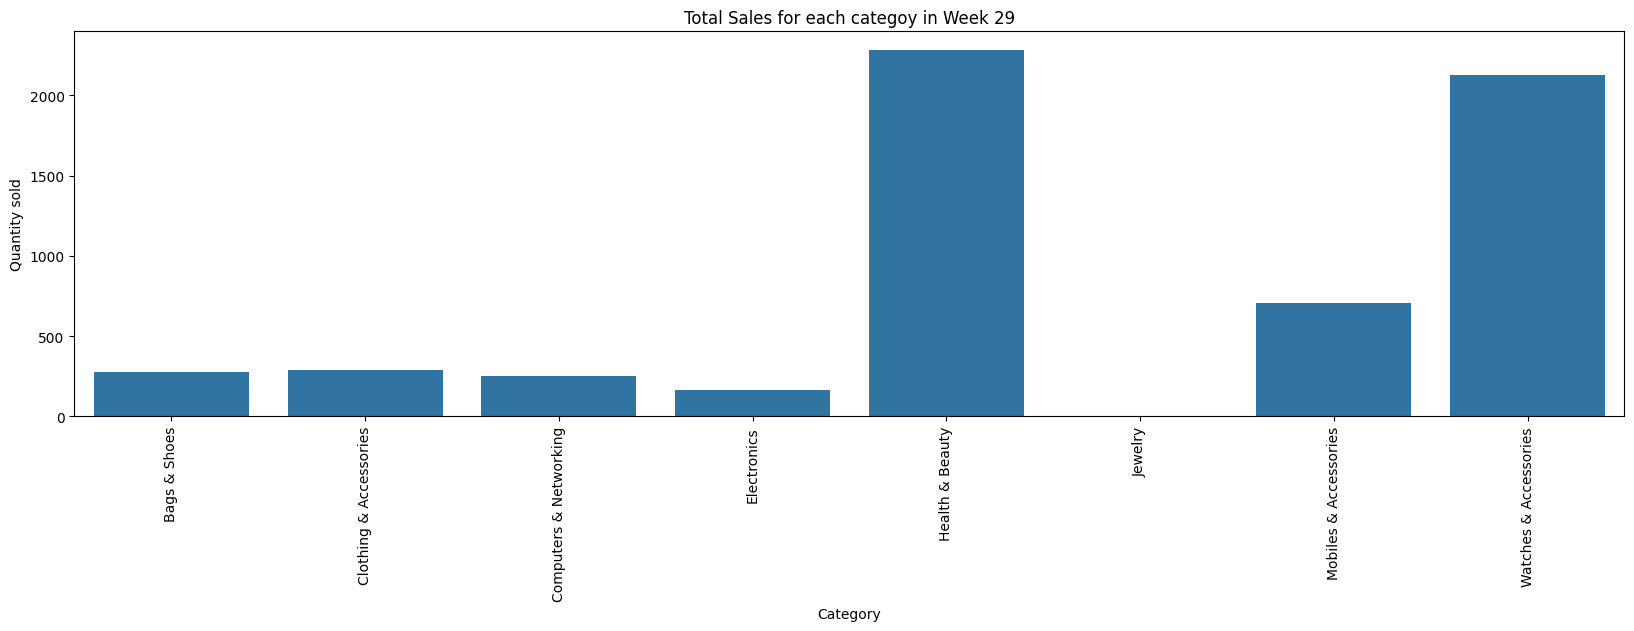

In [80]:
plt.figure(figsize=(20,5))

sns.barplot(Grouped_Week29, x = 'Category', y = "Quantity sold")

plt.title("Total Sales for each categoy in Week 29")
plt.yticks()
plt.xticks(rotation = 90)
plt.show()

## Share the sales and margin trends by category over the last 4 weeks basis the total orders, cost and margins. Create charts to depict the trends

In [81]:

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

last_4_weeks = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(weeks=4)]


In [82]:
last_4_weeks.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
0,2013-07-28,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20%,50,40.0
1,2013-07-30,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20%,50,40.0
2,2013-07-05,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20%,100,80.0
3,2013-07-21,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 10/9956CMHN Swarovski Crys...",2724275075270,1,20%,352,281.6
4,2013-07-29,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 104899BKSB Silver-Tone Bla...",2724275168361,1,20%,202,161.6


In [83]:
order_id_trend = last_4_weeks.groupby("Category")["Order ID"].nunique().reset_index()
order_id_trend

,Category,Order ID
0,Bags & Shoes,984
1,Clothing & Accessories,1181
2,Computers & Networking,1254
3,Electronics,697
4,Health & Beauty,5556
5,Jewelry,11
6,Mobiles & Accessories,3195
7,Watches & Accessories,7701


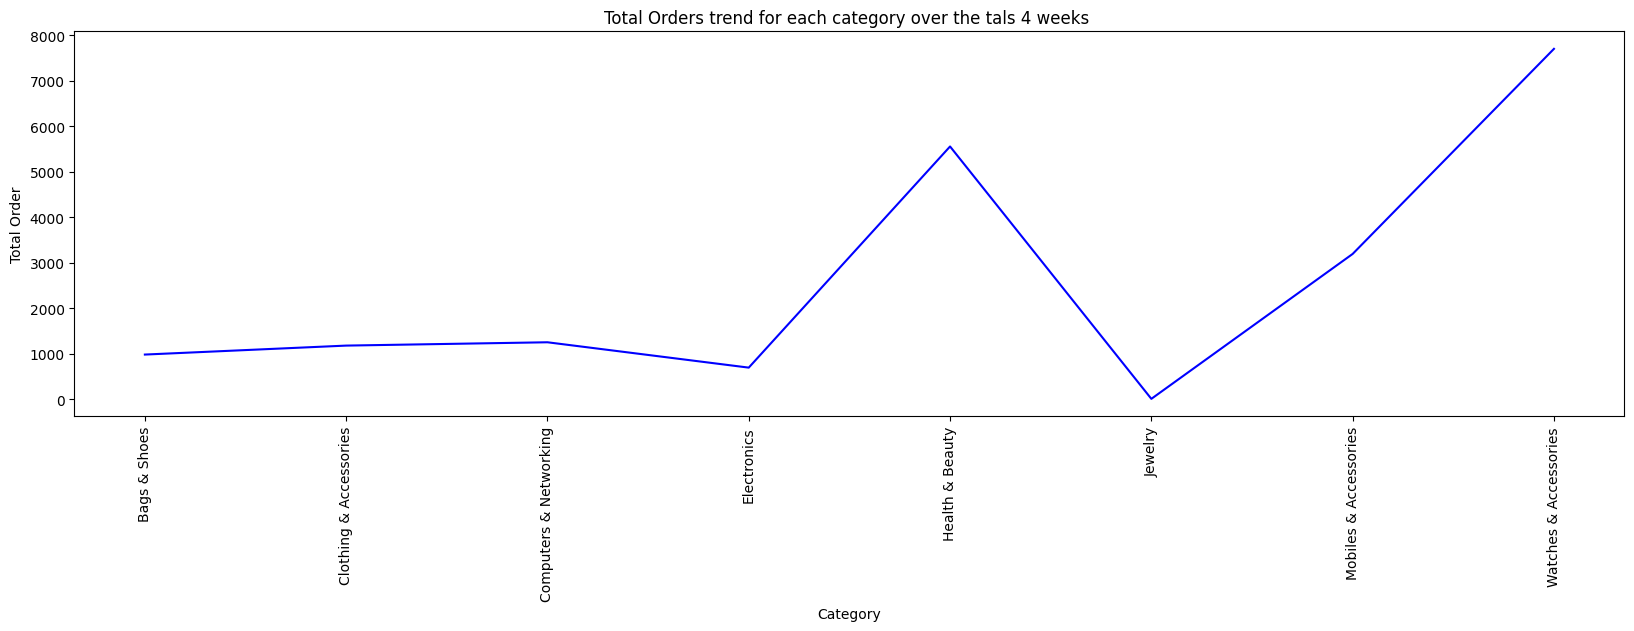

In [84]:
plt.figure(figsize=(20,5))

sns.lineplot(order_id_trend, x = 'Category', y = "Order ID", color = 'blue')

plt.title("Total Orders trend for each category over the tals 4 weeks ")
plt.xlabel("Category")
plt.ylabel("Total Order")
plt.xticks(rotation = 90)
plt.show()

In [85]:
cost_trend = last_4_weeks.groupby("Category")["Cost"].sum().reset_index()
cost_trend

,Category,Cost
0,Bags & Shoes,134395.20
1,Clothing & Accessories,139810.40
2,Computers & Networking,2131974.24
3,Electronics,802523.70
4,Health & Beauty,769623.20
5,Jewelry,420.00
6,Mobiles & Accessories,3466675.80
7,Watches & Accessories,1230672.00


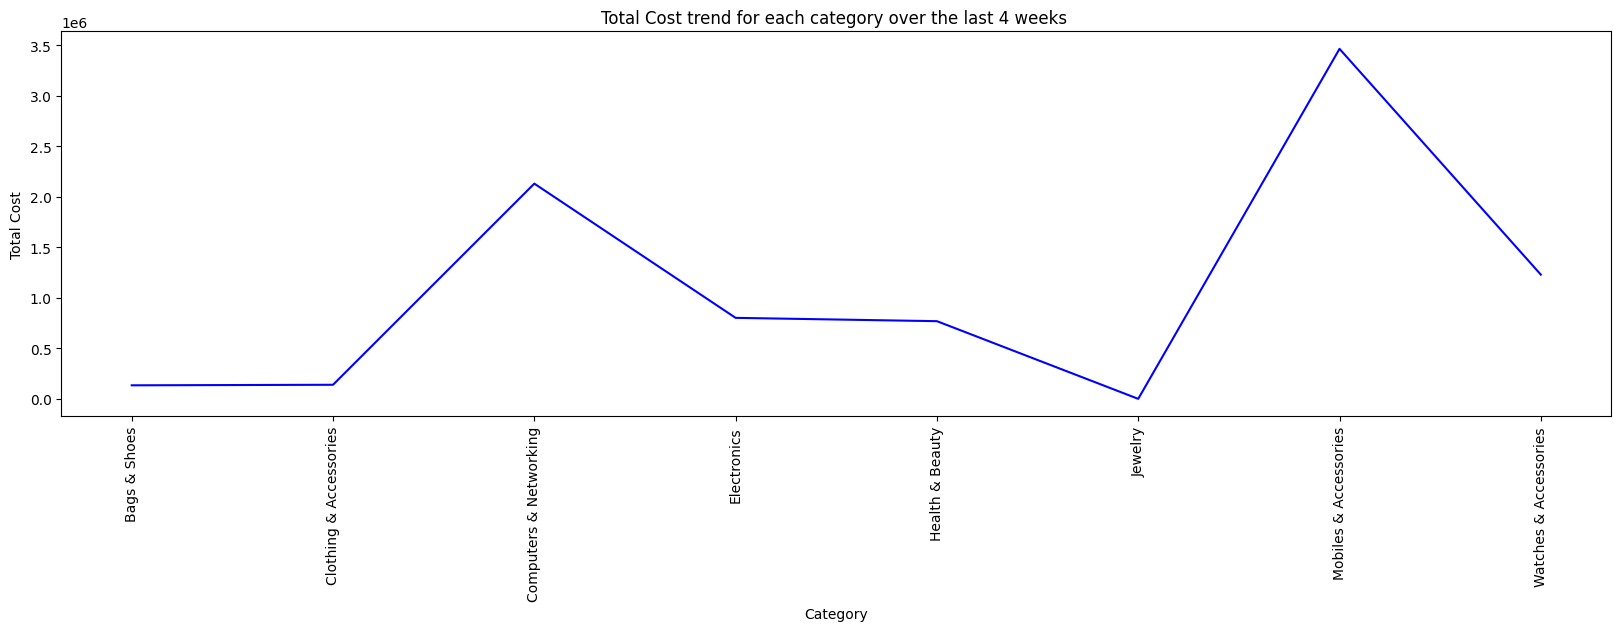

In [86]:
plt.figure(figsize=(20,5))

sns.lineplot(cost_trend, x = 'Category', y = "Cost", color = 'blue')

plt.title("Total Cost trend for each category over the last 4 weeks ")
plt.xlabel("Category")
plt.ylabel("Total Cost")
plt.xticks(rotation = 90)
plt.show()

In [87]:
# Convert 'Margin %' column to strings and remove the percentage sign
df['Margin %'] = df['Margin %'].astype(str).str.rstrip('%')




In [88]:
df.isnull().sum()

Order Date       0
Week Number      0
Order ID         0
Category         0
Item Type        0
Seller Name      0
Brand            1
Item Title       0
Bar Code         0
Quantity sold    0
Margin %         0
Price            0
Cost             0
dtype: int64

In [89]:
df.head()

,Order Date,Week Number,Order ID,Category,Item Type,Seller Name,Brand,Item Title,Bar Code,Quantity sold,Margin %,Price,Cost
0,2013-07-28,31,3288102,Bags & Shoes,Shoes,cocosstore,COCOS,3351,2724269438678,1,20,50,40.0
1,2013-07-30,31,3306068,Bags & Shoes,Shoes,cocosstore,COCOS,3353,2724271349252,1,20,50,40.0
2,2013-07-05,27,3156053,Bags & Shoes,Handbags,cocosstore,COCOS,8908,2724272504018,1,20,100,80.0
3,2013-07-21,30,3246265,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 10/9956CMHN Swarovski Crys...",2724275075270,1,20,352,281.6
4,2013-07-29,31,3295210,Watches & Accessories,Watches,FlagmanPeak,AK Anne Klein,"""Anne Klein Women's 104899BKSB Silver-Tone Bla...",2724275168361,1,20,202,161.6


In [90]:
df["Margin %"]

0        20
1        20
2        20
3        20
4        20
         ..
27457    20
27458    20
27459    20
27460    20
27461    20
Name: Margin %, Length: 27462, dtype: object

In [91]:
# Convert the 'Margin %' column to numeric, coercing non-numeric values to NaN
df['Margin %'] = pd.to_numeric(df['Margin %'], errors='coerce')

In [92]:
df["Margin %"]

0        20
1        20
2        20
3        20
4        20
         ..
27457    20
27458    20
27459    20
27460    20
27461    20
Name: Margin %, Length: 27462, dtype: int64

In [93]:
last_4_weeks_margin = df[df['Order Date'] >= df['Order Date'].max() - pd.DateOffset(weeks=4)]
Margin_trend = last_4_weeks_margin.groupby("Category")["Margin %"].mean().reset_index()
Margin_trend

,Category,Margin %
0,Bags & Shoes,20.0
1,Clothing & Accessories,20.0
2,Computers & Networking,12.0
3,Electronics,10.0
4,Health & Beauty,20.0
5,Jewelry,20.0
6,Mobiles & Accessories,10.0
7,Watches & Accessories,20.0


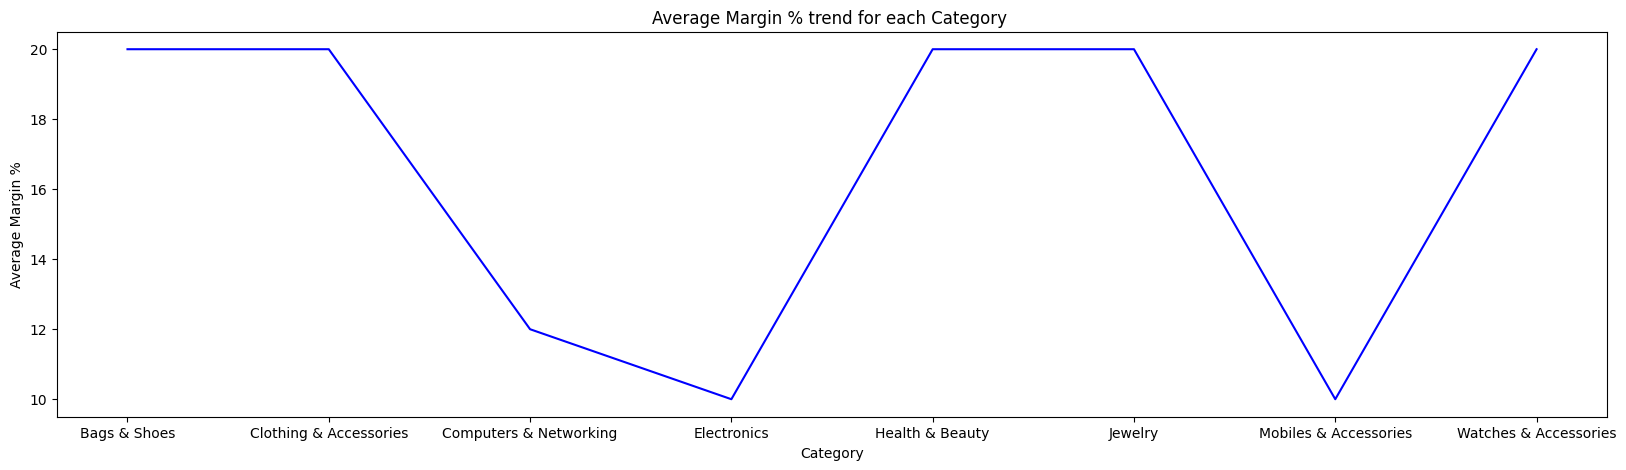

In [94]:
# Plotting Average Margin Percentage
plt.figure(figsize=(20,5))
sns.lineplot(Margin_trend, x = 'Category', y = "Margin %", color = 'blue')
plt.title('Average Margin % trend for each Category ')
plt.xlabel('Category')
plt.ylabel('Average Margin %')
plt.show()